# Taylor Expansion

[Chanseok Kang](https://kcsgoodboy.github.io) ([LG
Electronics](https://www.lge.co.kr/))  
2025-07-28

## Package Import

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

> **Note**
>
> This content is a summary of Börge Göbel’s [“Computational Physics:
> Scientific Programming with
> Python”](https://www.udemy.com/course/computational-physics) on Udemy.

## Why Taylor Expansion?

The reason for using Taylor Expansion is to approximate complex
functions into simple polynomial forms. When studying mathematics,
various formulas appear, and the original forms of the equations we
often encounter in theory are usually composed of trigonometric or
exponential functions. Operations between these functions are too
complex and computationally expensive to calculate directly, but using
Taylor Expansion, these complex expressions can be easily represented.
For example, if the derivative of a function can be calculated, an
approximate value of the function for a specific point can be expressed
using this derivative.

$$f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n$$

Here, $f^{(n)}$ is the $n$-th derivative of $f(x)$, and $x_0$ represents
the position of the value we want to calculate.

## 1.1 Exponential Function

If the original form of the function we want to find is an exponential
function, we can easily apply the Taylor Expansion.

$$f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x)$$

This is because the derivative of the exponential function is the
exponential function itself. The code and visualization for this can be
expressed as follows.

In [2]:
def ExpTaylor(x, x0, nmax):
    t = 0
    for n in range(nmax + 1):
        t = t + (np.exp(x0) * (x - x0) ** n) / scipy.special.factorial(n)
    return t

> **Note**
>
> In the original example, `np.math.factorial` was used for the
> factorial calculation, but the `math` sub-package was not originally
> provided by `numpy`. So, as the version was updated and `math` was
> removed, the example above was changed to calculate it through
> `scipy.special`. The result is the same as we think.

In [3]:
np.exp(1), ExpTaylor(1, 0, 10)

(2.718281828459045, 2.7182818011463845)

So, if you compare the actual value of the natural function with the
approximate value, you can see that they are quite similar.

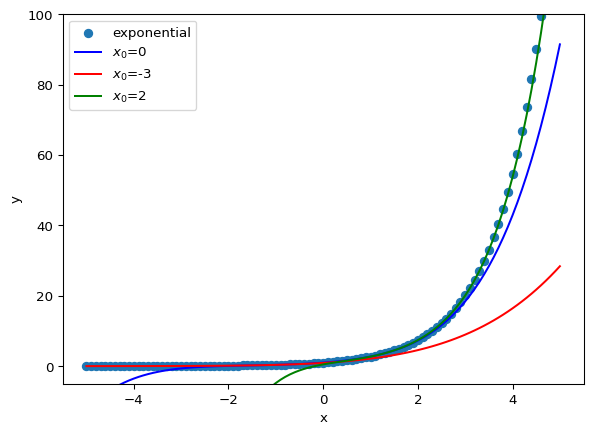

In [4]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-5, 100])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, np.exp(x_list), label='exponential')

nmax = 5
plt.plot(x_list, ExpTaylor(x_list, 0, nmax), c='blue', label='$x_0$=0')
plt.plot(x_list, ExpTaylor(x_list, -3, nmax), c='red', label='$x_0$=-3')
plt.plot(x_list, ExpTaylor(x_list, 2, nmax), c='green', label='$x_0$=2')
plt.legend()
plt.show()

In fact, it is an area of approximation to reduce the amount of
computation, and the part that cannot accurately represent the function
can be seen just by checking the result of changing the initial point.
However, if an appropriate initial point is selected, an approximate
value that is close to the original function we want to find can be
obtained.

## 1.2 Sin function at $x_0=0$

The Taylor expansion of the sin function among trigonometric functions
is expressed as follows.

$f(0) = f''(0) = f^{(4)}(0) = \dots = 0$

$f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1$

$f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1$

$\sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}$

In [5]:
def SinTaylor(x, nmax):
    t = 0
    for n in range(nmax + 1):
        t = t + ((-1) ** n / scipy.special.factorial(2 * n + 1)) * (x ** (2 * n + 1))
    return t

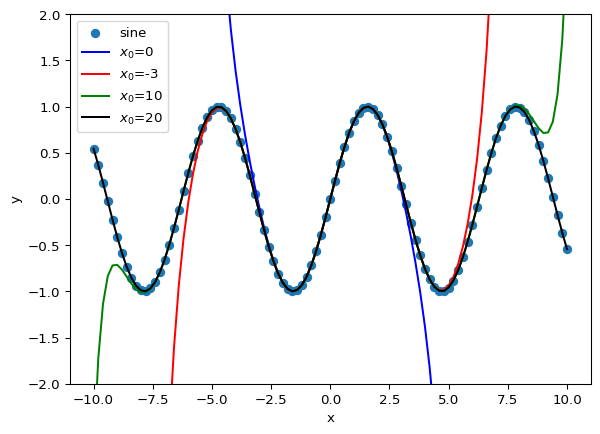

In [6]:
x_list = np.linspace(-10, 10, 101)
plt.ylim([-2, 2])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, np.sin(x_list), label='sine')

plt.plot(x_list, SinTaylor(x_list, 3), c='blue', label='$x_0$=0')
plt.plot(x_list, SinTaylor(x_list, 6), c='red', label='$x_0$=-3')
plt.plot(x_list, SinTaylor(x_list, 10), c='green', label='$x_0$=10')
plt.plot(x_list, SinTaylor(x_list, 20), c='black', label='$x_0$=20')
plt.legend()
plt.show()

In [7]:
np.sin(2.5), SinTaylor(2.5, 10)

(0.5984721441039565, 0.598472144104011)

## 1.3 Implementation of General Function

The previous example was shown assuming that the derivative for a simple
function is known, and the formula for obtaining the actual derivative
is as follows.

$$f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

In [8]:
def derivative(f, x, h):
    # Adding Small number to avoid ZeroDivision Error
    return (f(x + h) - f(x)) / (h + 0.000001)

However, the above formula was for obtaining the first derivative, and
the $n$-th derivative, which is differentiated $n$ times, is obtained by
repeatedly performing the above formula, which is expressed a little
more complicatedly as follows.

$$f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)$$

In [9]:
def nDerivative(f, x, h, n):
    t = 0
    for k in range(n + 1):
        t = t + (-1) **(k + n) * scipy.special.factorial(n) / (scipy.special.factorial(k) * scipy.special.factorial(n - k)) * f(x + k * h)
    return t / (h ** n)

let’s find the derivative for the following equation.

$$f(x) = 2 * \sin^2(x) + x$$

In [10]:
def func(x):
    return 2 * np.sin(x) ** 2 + x

In [11]:
x0 = 10.5
h = 0.1

In [12]:
func(x0)

12.04772926022427

In [13]:
derivative(func, x0, h)

2.5529714426967454

In [14]:
nDerivative(func, x0, h, 0), nDerivative(func, x0, h, 1), nDerivative(func, x0, h, 2)

(12.04772926022427, 2.5529969724111723, -2.802754599797907)

In [15]:
nDerivative(func, x0, h, 1)

2.5529969724111723

## 1.4 Taylor Expansion of General Function

Now, let’s bring back the Taylor Expansion formula introduced at the
beginning:

$$f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n$$

Ultimately, this formula allows for approximation only if the derivative
of the function can be found. Now, let’s replace the derivative part
with the function defined above.

In [16]:
def taylor(f, x, x0, nmax, h):
    t = 0
    for n in range(nmax + 1):
        t = t + nDerivative(f, x0, h, n) * (x - x0) ** n / scipy.special.factorial(n)
    return t

First, if we approximate with 5 samples and set the derivative step to
0.1, it approximates well within a certain range, but if it goes out of
range, the value jumps out.

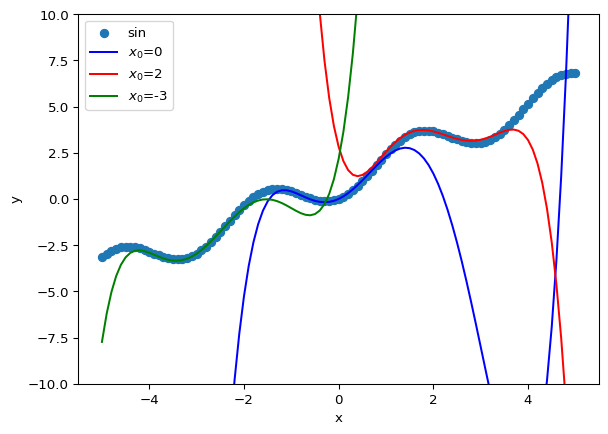

In [17]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-10, 10])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, func(x_list), label='sin')

nmax = 5
h = 0.1

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), c='blue', label='$x_0$=0')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), c='red', label='$x_0$=2')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), c='green', label='$x_0$=-3')
plt.legend()
plt.show()

If nmax is increased by 10, the output gets more accurate result besides
previous ones.

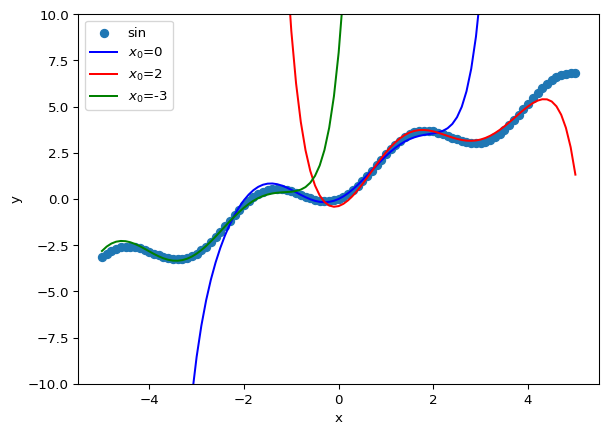

In [18]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-10, 10])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, func(x_list), label='sin')

nmax = 10
h = 0.1

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), c='blue', label='$x_0$=0')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), c='red', label='$x_0$=2')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), c='green', label='$x_0$=-3')
plt.legend()
plt.show()

Additionally, we can get more accurate result if we decrease the step
size that used to calculate the derivative.

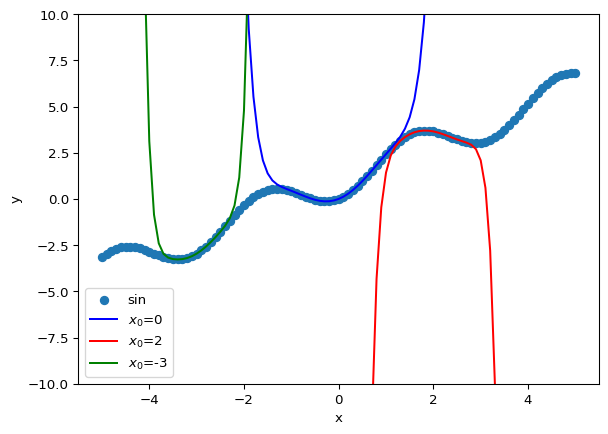

In [19]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-10, 10])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, func(x_list), label='sin')

nmax = 10
h = 0.01

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), c='blue', label='$x_0$=0')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), c='red', label='$x_0$=2')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), c='green', label='$x_0$=-3')
plt.legend()
plt.show()

In short, if a function is computationally expensive to evaluate,
obtaining its derivative can help. Additionally, the more samples you
have of the function, the better you can approximate its true value.